In [117]:
from rdflib import Graph, Namespace
from rdflib.plugins.sparql import prepareQuery
from shapely.geometry import Polygon
import re

In [5]:
# Load the RDF file
g = Graph()
g.parse("LBD files/set2/outputDuplex_A_20110505.ifc.ttl")

<Graph identifier=Ne71af7376fac4b44ada3ae076a999e9d (<class 'rdflib.graph.Graph'>)>

In [6]:
# Define namespaces
# using set2 duplex model (side question: how to make namespace all the same across LBDs generated?)
geo = Namespace("http://www.opengis.net/ont/geosparql#")
ns1 = Namespace("http://lbd.arch.rwth-aachen.de/props#")
ns2 = Namespace("https://linkedbuildingdata.org/LBD#")
ns3 = Namespace("https://w3id.org/bot#")
ns4 = Namespace("https://w3id.org/fog#")
ns5 = Namespace("https://w3id.org/omg#")
owl = Namespace("http://www.w3.org/2002/07/owl#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")

In [7]:
# Define the SPARQL query
query = prepareQuery("""
    PREFIX ns2: <https://linkedbuildingdata.org/LBD#>

    SELECT ?element ?xMax ?xMin ?yMax ?yMin ?zMax ?zMin
    WHERE {
    ?element ns2:hasBoundingBox ?boundingBox .
    ?boundingBox ns2:x-max ?xMax ;
                ns2:x-min ?xMin ;
                ns2:y-max ?yMax ;
                ns2:y-min ?yMin ;
                ns2:z-max ?zMax ;
                ns2:z-min ?zMin .
    }
""", initNs={"ns1": ns1, "ns2": ns2, "ns3": ns3, "ns4": ns4, "ns5": ns5})


In [8]:
# Execute the query
results = g.query(query)

In [12]:
# Print the results
for row in results:
    print(f"Name: {row['element']}")
    print(f"Bounding Box:")
    print(f"  x-max: {row['xMax']}")
    print(f"  x-min: {row['xMin']}")
    print(f"  y-max: {row['yMax']}")
    print(f"  y-min: {row['yMin']}")
    print(f"  z-max: {row['zMax']}")
    print(f"  z-min: {row['zMin']}")
    print()

Name: https://example.domain.de/beam_98d604b7-4c6f-4ae8-b5f3-0187bb53ebc8_geometry
Bounding Box:
  x-max: 4.501500000000002^^http://www.w3.org/2001/XMLSchema#double
  x-min: 4.2985000000000015^^http://www.w3.org/2001/XMLSchema#double
  y-max: -10.000000000000014^^http://www.w3.org/2001/XMLSchema#double
  y-min: -17.42129999999998^^http://www.w3.org/2001/XMLSchema#double
  z-max: 3.10000000000019^^http://www.w3.org/2001/XMLSchema#double
  z-min: 2.7970000000001902^^http://www.w3.org/2001/XMLSchema#double

Name: https://example.domain.de/beam_98d604b7-4c6f-4ae8-b5f3-0187bb53f220_geometry
Bounding Box:
  x-max: 6.448499999999999^^http://www.w3.org/2001/XMLSchema#double
  x-min: 0.2666128795750412^^http://www.w3.org/2001/XMLSchema#double
  y-max: -17.433999999999976^^http://www.w3.org/2001/XMLSchema#double
  y-min: -17.611999999999977^^http://www.w3.org/2001/XMLSchema#double
  z-max: 3.1000000000001897^^http://www.w3.org/2001/XMLSchema#double
  z-min: 2.6930000000001906^^http://www.w3.org/

In [24]:
# Define the SPARQL query
# get element types count
query = prepareQuery("""
    PREFIX ns2: <https://linkedbuildingdata.org/LBD#>
    PREFIX ns5: <https://w3id.org/omg#>
    PREFIX ns3: <https://w3id.org/bot#>

    SELECT ?elementType (COUNT(?element) AS ?count)
    WHERE {
    ?element a ?elementType ;
            ns5:hasGeometry ?geometry .
    FILTER (?elementType != ns3:Element)
    }
    GROUP BY ?elementType
""", initNs={"ns1": ns1, "ns2": ns2, "ns3": ns3, "ns4": ns4, "ns5": ns5})

In [25]:
# Execute the query
results = g.query(query)

In [26]:
# Print the counts
for row in results:
    elementType = row['elementType']
    count = row['count']
    print(f"Element Type: {elementType}, Count: {count}")

Element Type: https://pi.pauwel.be/voc/buildingelement#Beam, Count: 8
Element Type: https://standards.buildingsmart.org/IFC/DEV/IFC2x3/TC1/OWL#IfcOpeningElement, Count: 50
Element Type: https://pi.pauwel.be/voc/buildingelement#Wall, Count: 49
Element Type: https://pi.pauwel.be/voc/buildingelement#Covering, Count: 13
Element Type: https://pi.pauwel.be/voc/buildingelement#Covering-CEILING, Count: 13
Element Type: https://pi.pauwel.be/voc/buildingelement#Footing, Count: 7
Element Type: https://pi.pauwel.be/voc/buildingelement#Footing-STRIP_FOOTING, Count: 7
Element Type: http://pi.pauwel.be/voc/furniture#Furniture, Count: 61
Element Type: https://pi.pauwel.be/voc/buildingelement#Slab, Count: 19
Element Type: https://pi.pauwel.be/voc/buildingelement#Slab-ROOF, Count: 1
Element Type: https://pi.pauwel.be/voc/buildingelement#Slab-FLOOR, Count: 18
Element Type: https://pi.pauwel.be/voc/buildingelement#Window, Count: 24
Element Type: https://pi.pauwel.be/voc/buildingelement#Door, Count: 14
Ele

In [137]:
query = prepareQuery("""
PREFIX ns2: <https://linkedbuildingdata.org/LBD#>
PREFIX ns5: <https://w3id.org/omg#>
PREFIX ns3: <https://w3id.org/bot#>

SELECT ?space ?xMax ?xMin ?yMax ?yMin ?zMax ?zMin
WHERE {
        ?space a ns3:Space ;
                ns5:hasGeometry ?geometry .
        ?geometry ns2:hasBoundingBox ?boundingBox .
        ?boundingBox ns2:x-max ?xMax ;
                ns2:x-min ?xMin ;
                ns2:y-max ?yMax ;
                ns2:y-min ?yMin ;
                ns2:z-max ?zMax ;
                ns2:z-min ?zMin .
}
""", initNs={"ns1": ns1, "ns2": ns2, "ns3": ns3, "ns4": ns4, "ns5": ns5})

In [138]:
# Execute the query
results = g.query(query)

In [139]:
# Print the bounding box information
for row in results:
    space = row[0]
    x_max = row[1]
    x_min = row[2]
    y_max = row[3]
    y_min = row[4]
    z_max = row[5]
    z_min = row[6]
    
    print(f"Space: {space}")
    print("Bounding Box:")
    print(f"  x-max: {x_max}")
    print(f"  x-min: {x_min}")
    print(f"  y-max: {y_max}")
    print(f"  y-min: {y_min}")
    print(f"  z-max: {z_max}")
    print(f"  z-min: {z_min}")
    print()

Space: https://example.domain.de/space_0b74b3fa-1a92-405e-9ac9-d59067be1d42
Bounding Box:
  x-max: 6.199999999999996^^http://www.w3.org/2001/XMLSchema#double
  x-min: 0.41700000000000026^^http://www.w3.org/2001/XMLSchema#double
  y-max: -12.6^^http://www.w3.org/2001/XMLSchema#double
  y-min: -17.38299999999999^^http://www.w3.org/2001/XMLSchema#double
  z-max: 2.6^^http://www.w3.org/2001/XMLSchema#double
  z-min: 0.01900000000000001^^http://www.w3.org/2001/XMLSchema#double

Space: https://example.domain.de/space_aa6e13ea-b5bc-4245-93bf-8b23558433df
Bounding Box:
  x-max: 6.294000000000007^^http://www.w3.org/2001/XMLSchema#double
  x-min: 4.769999999999988^^http://www.w3.org/2001/XMLSchema#double
  y-max: -6.790000000000006^^http://www.w3.org/2001/XMLSchema#double
  y-min: -7.721384235071525^^http://www.w3.org/2001/XMLSchema#double
  z-max: 5.7000000000001965^^http://www.w3.org/2001/XMLSchema#double
  z-min: 3.113000000000196^^http://www.w3.org/2001/XMLSchema#double

Space: https://examp

In [140]:
# Initialize an empty list to store space data
spaces = []

# Iterate through the results and extract bounding box information for each space
for row in results:
    space_uri = str(row["space"]).split("^")[0]  # Extracting only the URI part and removing the datatype suffix
    x_max = float(row["xMax"].split("^^")[0])
    x_min = float(row["xMin"].split("^^")[0])
    y_max = float(row["yMax"].split("^^")[0])
    y_min = float(row["yMin"].split("^^")[0])
    z_max = float(row["zMax"].split("^^")[0])
    z_min = float(row["zMin"].split("^^")[0])
    
    # Append the extracted data to the spaces list
    spaces.append((space_uri, x_max, x_min, y_max, y_min, z_max, z_min))

# Print the extracted space data
for space_data in spaces:
    print(space_data)



('https://example.domain.de/space_0b74b3fa-1a92-405e-9ac9-d59067be1d42', 6.199999999999996, 0.41700000000000026, -12.6, -17.38299999999999, 2.6, 0.01900000000000001)
('https://example.domain.de/space_aa6e13ea-b5bc-4245-93bf-8b23558433df', 6.294000000000007, 4.769999999999988, -6.790000000000006, -7.721384235071525, 5.7000000000001965, 3.113000000000196)
('https://example.domain.de/space_0b74b3fa-1a92-405e-9ac9-d59067be1d68', 6.294000000000003, 4.7699999999999845, -7.845384235071526, -10.950000000000008, 5.7000000000001965, 3.113000000000196)
('https://example.domain.de/space_0b74b3fa-1a92-405e-9ac9-d59067bfe0cc', 4.029999999999986, 2.505999999999996, -6.850000000000005, -9.970051178510587, 5.7000000000001965, 3.113000000000196)
('https://example.domain.de/space_0b74b3fa-1a92-405e-9ac9-d59067bfe0dc', 8.382999999999988, 2.5740000000000025, -5.200000000000001, -7.429999999999982, 2.600000000000001, 0.01299999999999975)
('https://example.domain.de/space_aa6e13ea-b5bc-4245-93bf-8b23558433cc

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

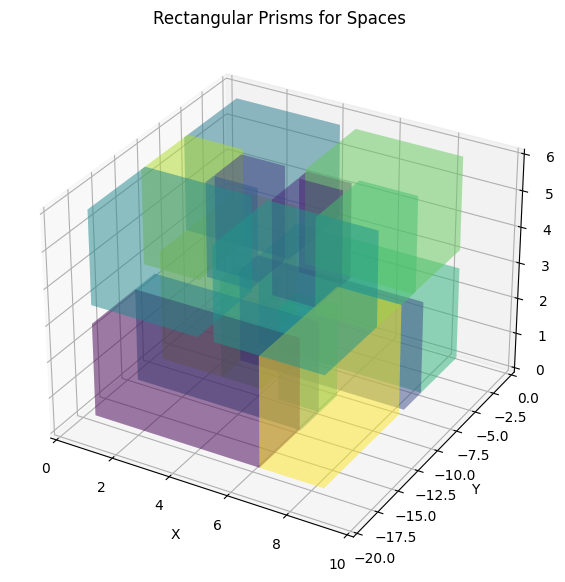

In [143]:
# Generate a list of unique colors for each space
colors = plt.cm.viridis(np.linspace(0, 1, len(spaces)))

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot rectangular prisms for each space with different colors
for i, (space, x_max, x_min, y_max, y_min, z_max, z_min) in enumerate(spaces):
    # Define vertices of the prism
    vertices = [
        (x_min, y_min, z_min),
        (x_max, y_min, z_min),
        (x_max, y_max, z_min),
        (x_min, y_max, z_min),
        (x_min, y_min, z_max),
        (x_max, y_min, z_max),
        (x_max, y_max, z_max),
        (x_min, y_max, z_max)
    ]
    # Define faces of the prism
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Side face 1
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Side face 2
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Side face 3
        [vertices[3], vertices[0], vertices[4], vertices[7]]   # Side face 4
    ]
    prism = Poly3DCollection(faces, alpha=0.3, facecolor=colors[i])
    ax.add_collection3d(prism)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rectangular Prisms for Spaces')

# Set y-axis limits
ax.set_xlim(0, 10)
ax.set_ylim(-20, 0)
ax.set_zlim(0,6)

# Show plot
plt.show()

In [144]:
# Prepare the SPARQL query
#a space and the whats in containsInBoundingBox
query = prepareQuery("""
PREFIX ns2: <https://linkedbuildingdata.org/LBD#>
PREFIX ns5: <https://w3id.org/omg#>
PREFIX ns3: <https://w3id.org/bot#>
PREFIX ns1: <http://lbd.arch.rwth-aachen.de/props#>
SELECT ?space ?name ?perimeter ?xMax ?xMin ?yMax ?yMin ?zMax ?zMin (GROUP_CONCAT(?element; separator=", ") AS ?elements) 
                                 (GROUP_CONCAT(?elementXMax; separator=", ") AS ?elementXMaxs)
                                 (GROUP_CONCAT(?elementXMin; separator=", ") AS ?elementXMins)
                                 (GROUP_CONCAT(?elementYMax; separator=", ") AS ?elementYMaxs)
                                 (GROUP_CONCAT(?elementYMin; separator=", ") AS ?elementYMins)
                                 (GROUP_CONCAT(?elementZMax; separator=", ") AS ?elementZMaxs)
                                 (GROUP_CONCAT(?elementZMin; separator=", ") AS ?elementZMins)
WHERE {
  VALUES ?space { <https://example.domain.de/space_0b74b3fa-1a92-405e-9ac9-d59067be1d42> }
  ?space a ns3:Space ;
         ns1:categoryDescription_property_simple ?name ;
         ns1:perimeter_property_simple ?perimeter ;
         ns5:hasGeometry ?geometry .
  ?geometry ns2:hasBoundingBox ?boundingBox .
  ?boundingBox ns2:x-max ?xMax ;
               ns2:x-min ?xMin ;
               ns2:y-max ?yMax ;
               ns2:y-min ?yMin ;
               ns2:z-max ?zMax ;
               ns2:z-min ?zMin .
  
  OPTIONAL {
    ?space ns2:containsInBoundingBox ?element .
    ?element ns5:hasGeometry ?elementGeometry .
    ?elementGeometry ns2:hasBoundingBox ?elementBoundingBox .
    ?elementBoundingBox ns2:x-max ?elementXMax ;
                        ns2:x-min ?elementXMin ;
                        ns2:y-max ?elementYMax ;
                        ns2:y-min ?elementYMin ;
                        ns2:z-max ?elementZMax ;
                        ns2:z-min ?elementZMin .
  }
}
GROUP BY ?space ?name ?perimeter
""", initNs={"ns1": ns1, "ns2": ns2, "ns3": ns3, "ns5": ns5})


In [145]:
# Execute the query
results = g.query(query)

In [146]:
# Iterate over the results and print them
for row in results:
    print("Space:", row['space'])
    print("Name:", row['name'])
    print("Perimeter:", row['perimeter'])
    print("Bounding Box:")
    print("  x-max:", row['xMax'])
    print("  x-min:", row['xMin'])
    print("  y-max:", row['yMax'])
    print("  y-min:", row['yMin'])
    print("  z-max:", row['zMax'])
    print("  z-min:", row['zMin'])
    print()
    
    elements = row['elements'].split(", ")
    elementXMaxs = row['elementXMaxs'].split(", ")
    elementXMins = row['elementXMins'].split(", ")
    elementYMaxs = row['elementYMaxs'].split(", ")
    elementYMins = row['elementYMins'].split(", ")
    elementZMaxs = row['elementZMaxs'].split(", ")
    elementZMins = row['elementZMins'].split(", ")
    
    for i, element in enumerate(elements):
        print("Element:", element)
        print("  Bounding Box:")
        print("    x-max:", elementXMaxs[i])
        print("    x-min:", elementXMins[i])
        print("    y-max:", elementYMaxs[i])
        print("    y-min:", elementYMins[i])
        print("    z-max:", elementZMaxs[i])
        print("    z-min:", elementZMins[i])
    print()

Space: https://example.domain.de/space_0b74b3fa-1a92-405e-9ac9-d59067be1d42
Name: Living Spaces
Perimeter: 22.02799999999997^^http://www.w3.org/2001/XMLSchema#decimal
Bounding Box:
  x-max: 6.199999999999996^^http://www.w3.org/2001/XMLSchema#double
  x-min: 0.41700000000000026^^http://www.w3.org/2001/XMLSchema#double
  y-max: -12.6^^http://www.w3.org/2001/XMLSchema#double
  y-min: -17.38299999999999^^http://www.w3.org/2001/XMLSchema#double
  z-max: 2.6^^http://www.w3.org/2001/XMLSchema#double
  z-min: 0.01900000000000001^^http://www.w3.org/2001/XMLSchema#double

Element: https://example.domain.de/furniture_982f59b0-f2e1-485f-8ce1-c9f6117b7638
  Bounding Box:
    x-max: 3.515899314066754^^http://www.w3.org/2001/XMLSchema#double
    x-min: 1.6858993140667535^^http://www.w3.org/2001/XMLSchema#double
    y-max: -14.980882664737328^^http://www.w3.org/2001/XMLSchema#double
    y-min: -15.895882664737373^^http://www.w3.org/2001/XMLSchema#double
    z-max: 0.45700000000000035^^http://www.w3.or

In [147]:
# Initialize a list to store space and element data
bb_data = []

# Iterate over the results and extract data
for row in results:
    space_uri = str(row['space']).split("^")[0]  # Extract space URI
    space_bb = float(row['xMax'].split("^^")[0]), float(row['xMin'].split("^^")[0]), \
               float(row['yMax'].split("^^")[0]), float(row['yMin'].split("^^")[0]), \
               float(row['zMax'].split("^^")[0]), float(row['zMin'].split("^^")[0])  # Extract space bounding box

    # Append space data to bb_data list
    bb_data.append((space_uri, *space_bb))

    # Extract element details
    elements = row['elements'].split(", ")
    elementXMaxs = [float(x.split("^^")[0]) for x in row['elementXMaxs'].split(", ")]
    elementXMins = [float(x.split("^^")[0]) for x in row['elementXMins'].split(", ")]
    elementYMaxs = [float(x.split("^^")[0]) for x in row['elementYMaxs'].split(", ")]
    elementYMins = [float(x.split("^^")[0]) for x in row['elementYMins'].split(", ")]
    elementZMaxs = [float(x.split("^^")[0]) for x in row['elementZMaxs'].split(", ")]
    elementZMins = [float(x.split("^^")[0]) for x in row['elementZMins'].split(", ")]

    for i, element in enumerate(elements):
        element_bb = float(elementXMaxs[i]), float(elementXMins[i]), \
                      float(elementYMaxs[i]), float(elementYMins[i]), \
                      float(elementZMaxs[i]), float(elementZMins[i])  # Extract element bounding box
        # Append element data to bb_data list
        bb_data.append((element, *element_bb))

# Print the extracted data (for verification)
for item in bb_data:
    print(item)


('https://example.domain.de/space_0b74b3fa-1a92-405e-9ac9-d59067be1d42', 6.199999999999996, 0.41700000000000026, -12.6, -17.38299999999999, 2.6, 0.01900000000000001)
('https://example.domain.de/furniture_982f59b0-f2e1-485f-8ce1-c9f6117b7638', 3.515899314066754, 1.6858993140667535, -14.980882664737328, -15.895882664737373, 0.45700000000000035, -2.3037127760972e-15)
('https://example.domain.de/furniture_982f59b0-f2e1-485f-8ce1-c9f6117b7639', 1.2058993140667646, 0.5958993140667638, -16.43338266473734, -17.043382664737383, 0.6100000000000002, -3.0531133177191805e-15)
('https://example.domain.de/furniture_982f59b0-f2e1-485f-8ce1-c9f6117b763c', 1.231099314066757, 0.5706993140667181, -14.440382664737323, -16.27038266473732, 0.8127999999999984, 0.0)
('https://example.domain.de/furniture_982f59b0-f2e1-485f-8ce1-c9f6117b763e', 1.5058993140667443, 0.8958993140667433, -13.750382664737337, -14.360382664737383, 0.6100000000000002, -3.0531133177191805e-15)
('https://example.domain.de/furniture_982f59

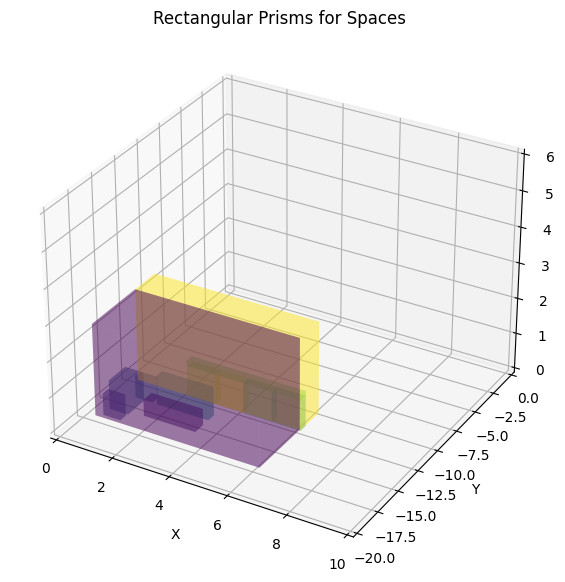

In [148]:
# Generate a list of unique colors for each space
colors = plt.cm.viridis(np.linspace(0, 1, len(bb_data)))

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot rectangular prisms for each space with different colors
for i, (bb, x_max, x_min, y_max, y_min, z_max, z_min) in enumerate(bb_data):
    # Define vertices of the prism
    vertices = [
        (x_min, y_min, z_min),
        (x_max, y_min, z_min),
        (x_max, y_max, z_min),
        (x_min, y_max, z_min),
        (x_min, y_min, z_max),
        (x_max, y_min, z_max),
        (x_max, y_max, z_max),
        (x_min, y_max, z_max)
    ]
    # Define faces of the prism
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Side face 1
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Side face 2
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Side face 3
        [vertices[3], vertices[0], vertices[4], vertices[7]]   # Side face 4
    ]
    prism = Poly3DCollection(faces, alpha=0.3, facecolor=colors[i])
    ax.add_collection3d(prism)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rectangular Prisms for Spaces')

# Set y-axis limits
ax.set_xlim(0, 10)
ax.set_ylim(-20, 0)
ax.set_zlim(0,6)

# Show plot
plt.show()

In [149]:
query = prepareQuery("""
PREFIX ns2: <https://linkedbuildingdata.org/LBD#>
PREFIX ns5: <https://w3id.org/omg#>
PREFIX ns3: <https://w3id.org/bot#>

SELECT ?wall ?xMax ?xMin ?yMax ?yMin ?zMax ?zMin
WHERE {
        ?wall a <https://pi.pauwel.be/voc/buildingelement#Wall> ;
                ns5:hasGeometry ?geometry .
        ?geometry ns2:hasBoundingBox ?boundingBox .
        ?boundingBox ns2:x-max ?xMax ;
                ns2:x-min ?xMin ;
                ns2:y-max ?yMax ;
                ns2:y-min ?yMin ;
                ns2:z-max ?zMax ;
                ns2:z-min ?zMin .
}
""", initNs={"ns1": ns1, "ns2": ns2, "ns3": ns3, "ns4": ns4, "ns5": ns5})

In [150]:
# Execute the query
results = g.query(query)

In [151]:
# Print the results
for row in results:
    print(f"Wall: {row['wall']}")
    print(f"Bounding Box:")
    print(f"  x-max: {row['xMax']}")
    print(f"  x-min: {row['xMin']}")
    print(f"  y-max: {row['yMax']}")
    print(f"  y-min: {row['yMin']}")
    print(f"  z-max: {row['zMax']}")
    print(f"  z-min: {row['zMin']}")
    print()

Wall: https://example.domain.de/wall_2da40d62-4698-436c-a2c3-95c49bb70c3c
Bounding Box:
  x-max: 8.800000000000002^^http://www.w3.org/2001/XMLSchema#double
  x-min: 0.0^^http://www.w3.org/2001/XMLSchema#double
  y-max: -5.551115123125783E-17^^http://www.w3.org/2001/XMLSchema#double
  y-min: -0.41700000000000015^^http://www.w3.org/2001/XMLSchema#double
  z-max: 6.609^^http://www.w3.org/2001/XMLSchema#double
  z-min: 6.0^^http://www.w3.org/2001/XMLSchema#double

Wall: https://example.domain.de/wall_2da40d62-4698-436c-a2c3-95c49bb70ca4
Bounding Box:
  x-max: 8.382999999999972^^http://www.w3.org/2001/XMLSchema#double
  x-min: -1.7763568394002505E-15^^http://www.w3.org/2001/XMLSchema#double
  y-max: -17.383^^http://www.w3.org/2001/XMLSchema#double
  y-min: -17.8^^http://www.w3.org/2001/XMLSchema#double
  z-max: 6.609^^http://www.w3.org/2001/XMLSchema#double
  z-min: 6.0^^http://www.w3.org/2001/XMLSchema#double

Wall: https://example.domain.de/wall_2da40d62-4698-436c-a2c3-95c49bb70cfa
Boundi

In [152]:
# Function to extract numerical value from RDF literal
def extract_numerical_value(literal):
    match = re.match(r"[-+]?\d*\.\d+|\d+", literal)
    if match:
        return float(match.group())
    else:
        return None

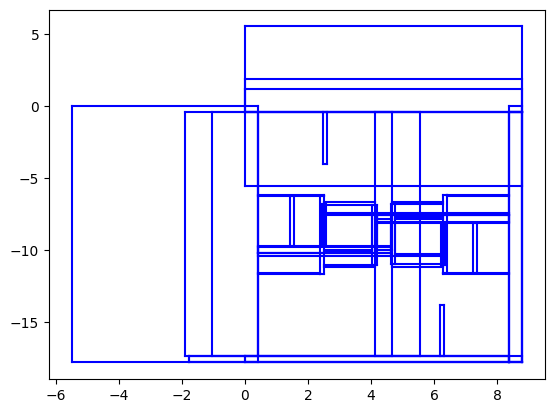

In [153]:
# Plot the walls
for row in results:
    x_max = extract_numerical_value(row['xMax'])
    x_min = extract_numerical_value(row['xMin'])
    y_max = extract_numerical_value(row['yMax'])
    y_min = extract_numerical_value(row['yMin'])
    
    plt.plot([x_min, x_max], [y_min, y_min], color='blue')  # Bottom side of the wall
    plt.plot([x_max, x_max], [y_min, y_max], color='blue')  # Right side of the wall
    plt.plot([x_min, x_max], [y_max, y_max], color='blue')  # Top side of the wall
    plt.plot([x_min, x_min], [y_min, y_max], color='blue')  # Left side of the wall

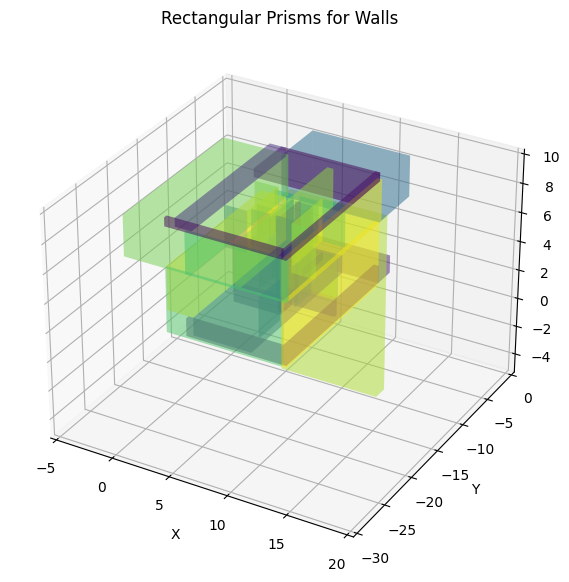

In [157]:
# Generate a list of unique colors for each wall
wall_colors = plt.cm.viridis(np.linspace(0, 1, len(results)))

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot rectangular prisms for each wall with different colors
for i, row in enumerate(results):
    x_max = extract_numerical_value(row['xMax'])
    x_min = extract_numerical_value(row['xMin'])
    y_max = extract_numerical_value(row['yMax'])
    y_min = extract_numerical_value(row['yMin'])
    z_max = extract_numerical_value(row['zMax'])
    z_min = extract_numerical_value(row['zMin'])

    # Define vertices of the prism
    vertices = [
        (x_min, y_min, z_min),
        (x_max, y_min, z_min),
        (x_max, y_max, z_min),
        (x_min, y_max, z_min),
        (x_min, y_min, z_max),
        (x_max, y_min, z_max),
        (x_max, y_max, z_max),
        (x_min, y_max, z_max)
    ]
    # Define faces of the prism
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Side face 1
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Side face 2
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Side face 3
        [vertices[3], vertices[0], vertices[4], vertices[7]]   # Side face 4
    ]
    prism = Poly3DCollection(faces, alpha=0.3, facecolor=wall_colors[i])
    ax.add_collection3d(prism)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rectangular Prisms for Walls')

# Set y-axis limits
ax.set_xlim(-5, 20)
ax.set_ylim(-30, 0)
ax.set_zlim(-5, 10)

# Show plot
plt.show()